# ML Practical No. 2
## By - Sujal Kumar Sinha
## Roll No. - BEB47

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
#columns that can be dropped are : RowNumber, CustomerID, Surname

In [ ]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#change categorial values to numbers
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],dtype='int')
gender = pd.get_dummies(df['Gender'],dtype='int')

In [ ]:
X = pd.concat([X,gender,states], axis = 1)

In [ ]:
# X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]
y = df['Exited']

In [ ]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,1,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1


In [ ]:
X.drop(columns=['Gender'],inplace=True)

In [ ]:
#Scale the columns : CreditScore, Age, Tenure, Balance, EstimatedSalary
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
X[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(X[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,0,1,0,0
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,1,0,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,1,0,1,0,0
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,1,0,1,0,0
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,1,0,0,0,1


In [ ]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
X.shape

(10000, 13)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [ ]:
import tensorflow
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(activation = "relu", input_dim = 13, units = 6, kernel_initializer = "uniform"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
classifier.add(Dense(activation = "relu", units = 6, kernel_initializer = "uniform"))

In [ ]:
classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))

In [ ]:
classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133 (532.00 B)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7811 - loss: 0.5769
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7927 - loss: 0.4430
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8001 - loss: 0.4293
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8078 - loss: 0.4173
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7958 - loss: 0.4346
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7950 - loss: 0.4252
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8018 - loss: 0.4206
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7962 - loss: 0.4297
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8080 - loss: 0.4184
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8111 - loss: 0.4197
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8140 - loss: 0.4349
Epoch 12/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2343,   74],
       [ 401,  182]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(95.72222222222221, 0.5, 'Truth')

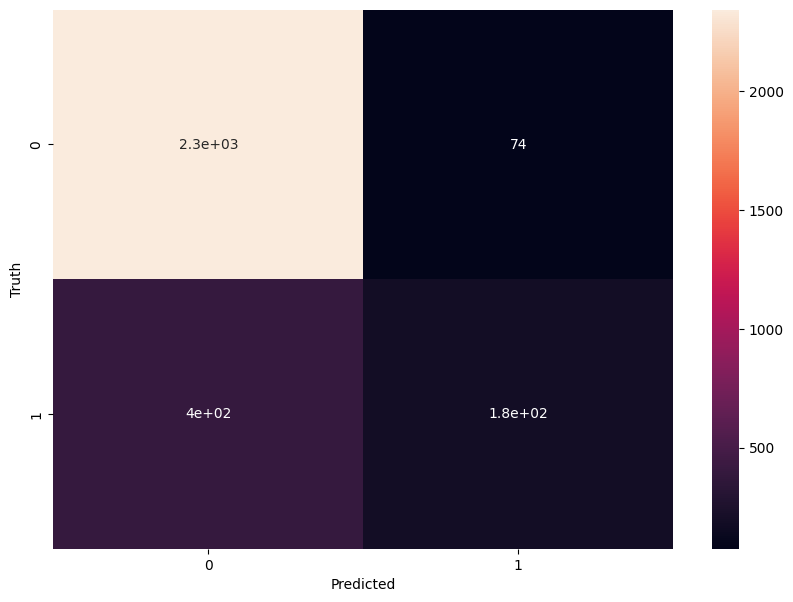

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2417
           1       0.71      0.31      0.43       583

    accuracy                           0.84      3000
   macro avg       0.78      0.64      0.67      3000
weighted avg       0.83      0.84      0.82      3000



In [ ]:
#use SMOTE to increase